In [1]:
import sys 
sys.path.append("/scratch/m/murray/dtolgay/")
from tools import functions_readfiles


import numpy as np 
import pandas as pd 
from tools import readsnap, readsnap_FIREBox, readsnap_tripleLatte, constants  # tools directory is in the appended system directory
from tools.filter_rotate_galaxy import filter_rotate_galaxy

import matplotlib.pyplot as plt 
import matplotlib

import h5py
from time import localtime 


import functions_AHF
import importlib


In [2]:
galaxy_type = "firebox"
redshift = "0.0"
galaxy_number = "96"


## Read cloudy file

In [3]:
%%time
importlib.reload(functions_readfiles)

print(f" -------------------------- For redshift: {redshift} --------------------------")

cloudy_gas_particles = functions_readfiles.read_cloudy_gas_particles(
        galaxy_name = f"gal{galaxy_number}", 
        galaxy_type = "firebox", 
        redshift = redshift, 
        directory_name = "voronoi_1e6",
        base_fdir = "/scratch/m/murray/dtolgay/post_processing_fire_outputs/skirt/runs_hden_radius"
    )

# Read star particles 
# comprehensive_star_particles = functions_readfiles.read_comprehensive_star_particles(
#         galaxy_name = f"gal{galaxy_number}", 
#         galaxy_type = "firebox", 
#         redshift = redshift, 
#         directory_name = "voronoi_1e6",
#         base_fdir = "/scratch/m/murray/dtolgay/post_processing_fire_outputs/skirt/runs_hden_radius"
#     )

 -------------------------- For redshift: 0.0 --------------------------


/scratch/m/murray/dtolgay/tools/functions_readfiles.py:42: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  cloudy_gas_particles = pd.read_csv(


CPU times: user 554 ms, sys: 46.9 ms, total: 601 ms
Wall time: 671 ms


## Read seperated firebox galaxy

In [4]:
file_name = f"gal_{galaxy_number}.hdf5"

gas_particles = {}
star_particles = {}

with h5py.File(f'z{redshift}/{file_name}', 'r') as f:
    for key in f['gas']:
        gas_particles[key] = f['gas'][key][:]
    for key in f['star']:
        star_particles[key] = f['star'][key][:]

        
# Create dataframe
gas_particles_read = functions_AHF.create_df_from_read_hdf5(particles = gas_particles, particle_type="gas")
star_particles_read = functions_AHF.create_df_from_read_hdf5(particles = star_particles, particle_type = "star")

gas_particles_processed, star_particles_processed = functions_AHF.process_and_rotate_galaxy(
    gas_particles_df = gas_particles_read.copy(),
    star_particles_df = star_particles_read.copy(),
)

Considering only 20.0 kpc from the center of the MMH.
Before: len(gas_particles_df): 186362 --- len(star_particles_df): 330549
After: len(gas_particles_df): 162887 --- len(star_particles_df): 322978
Rotating galaxy
I am in the function net_angular_momentum
I am in the function finding_the_angles_between_current_coordinate_system_and_net_angular_momentum
I am in the function rotating_coordinate_system_along_net_angular_momentum
I am in the function rotating_coordinate_system_along_net_angular_momentum
I am in the function rotating_coordinate_system_along_net_angular_momentum
I am in the function rotating_coordinate_system_along_net_angular_momentum


## Compare the results

### Plot and Check the Results 

Plotting galaxy


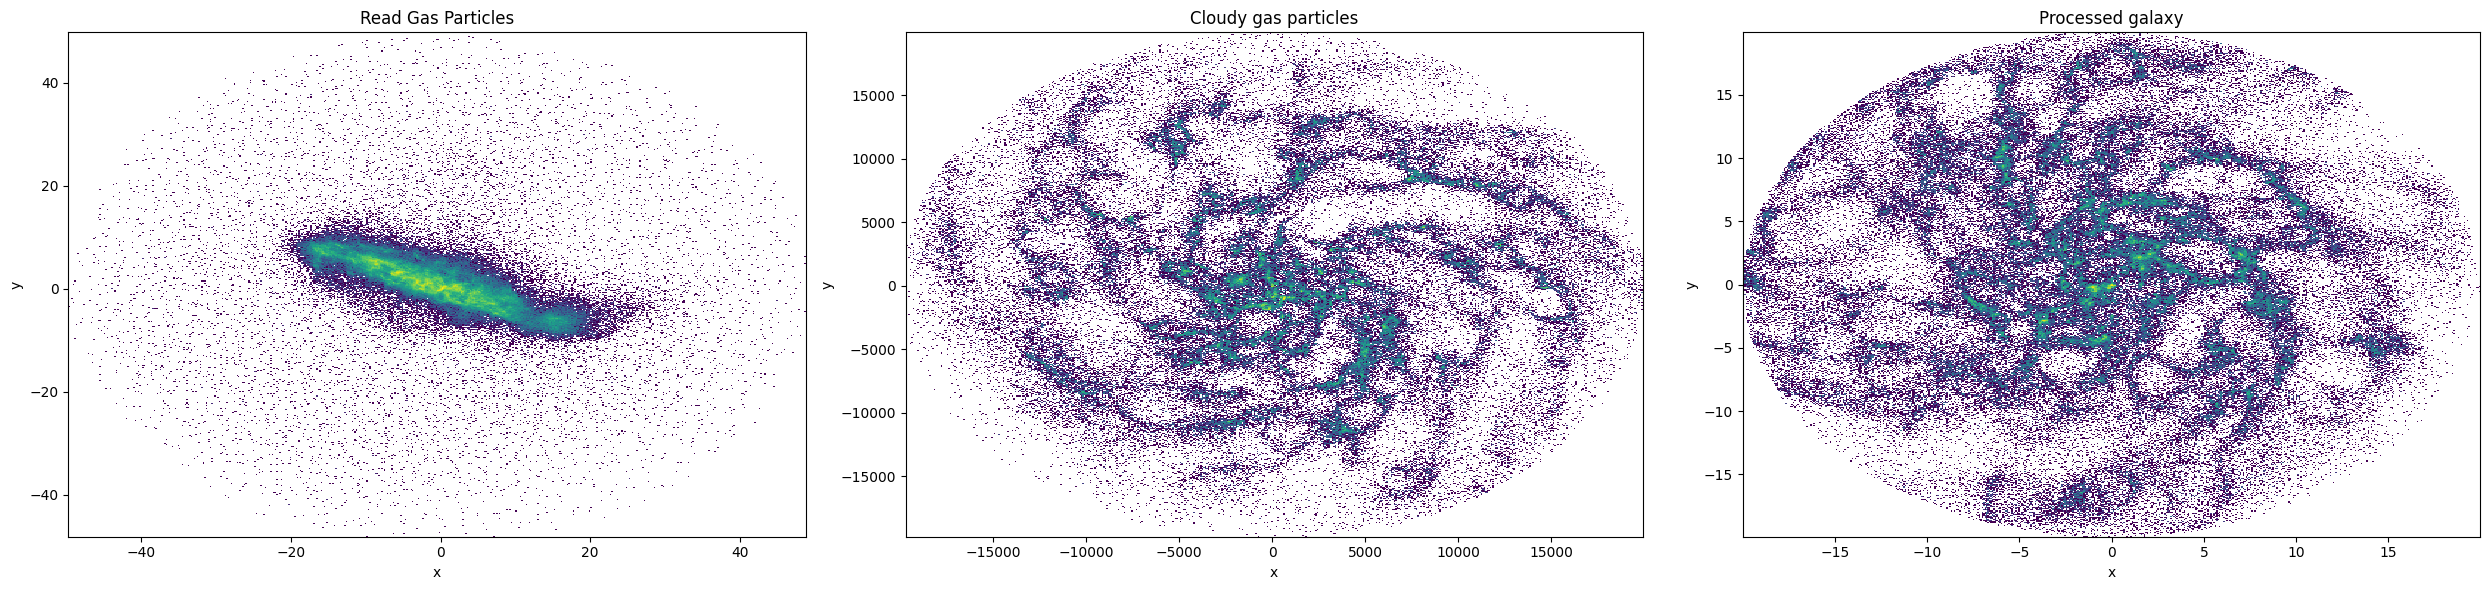

In [5]:
#################################### Plot

print("Plotting galaxy")
# Create a figure with two subplots
fig, axs = plt.subplots(1, 3, figsize=(25, 6))  # Adjust figsize as needed

# First subplot: x-y axis plot
axs[0].hist2d(
    x=gas_particles_read["x"], 
    y=gas_particles_read["y"], 
    bins=500,
    norm=matplotlib.colors.LogNorm(),
)
axs[0].set_title('Read Gas Particles')
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')

# Second subplot: z-y axis plot
axs[1].hist2d(
    x=cloudy_gas_particles["x"],  # Use the 'y' column for the x-axis
    y=cloudy_gas_particles["y"],  # Keep the 'z' column for the y-axis
    bins=500,
    norm=matplotlib.colors.LogNorm(),
#     range=[[-R_max, R_max], [-R_max, R_max]]
)
axs[1].set_title('Cloudy gas particles')
axs[1].set_xlabel('x')
axs[1].set_ylabel('y')

####
axs[2].hist2d(
    x=gas_particles_processed["x"],  # Use the 'y' column for the x-axis
    y=gas_particles_processed["y"],  # Keep the 'z' column for the y-axis
    bins=500,
    norm=matplotlib.colors.LogNorm(),
#     range=[[-R_max, R_max], [-R_max, R_max]]
)
axs[2].set_title('Processed galaxy')
axs[2].set_xlabel('x')
axs[2].set_ylabel('y')


# Show the figure
plt.tight_layout()


Plotting galaxy


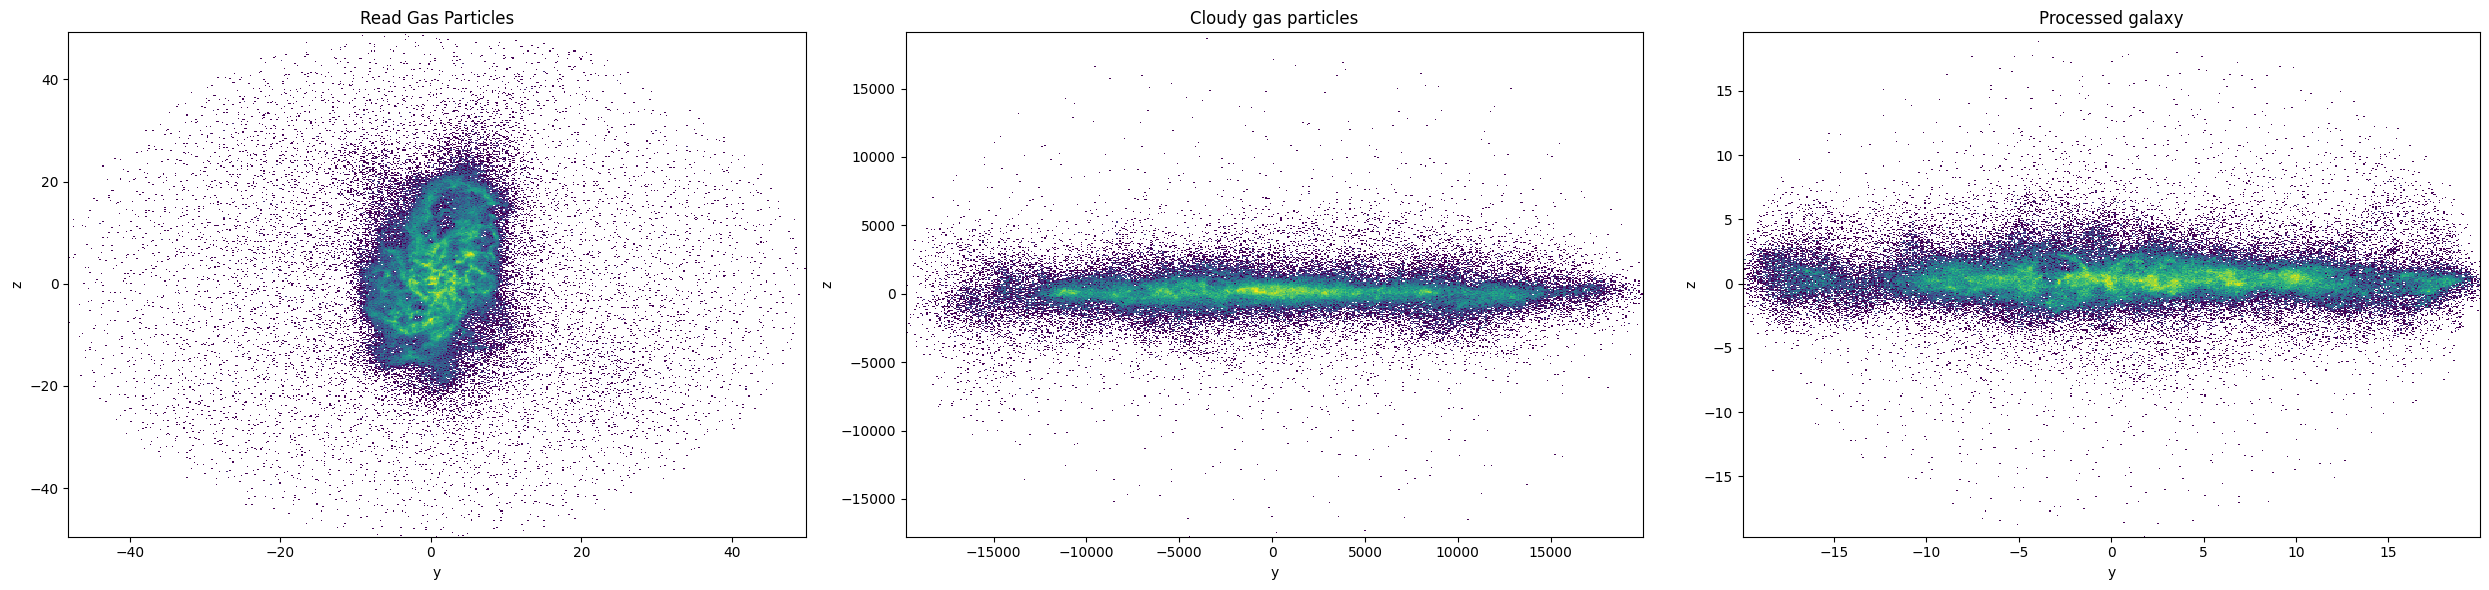

In [6]:
#################################### Plot

print("Plotting galaxy")
# Create a figure with two subplots
fig, axs = plt.subplots(1, 3, figsize=(25, 6))  # Adjust figsize as needed

# First subplot: x-y axis plot
axs[0].hist2d(
    x=gas_particles_read["y"], 
    y=gas_particles_read["z"], 
    bins=500,
    norm=matplotlib.colors.LogNorm(),
)
axs[0].set_title('Read Gas Particles')
axs[0].set_xlabel('y')
axs[0].set_ylabel('z')

# Second subplot: z-y axis plot
axs[1].hist2d(
    x=cloudy_gas_particles["y"],  # Use the 'y' column for the x-axis
    y=cloudy_gas_particles["z"],  # Keep the 'z' column for the y-axis
    bins=500,
    norm=matplotlib.colors.LogNorm(),
#     range=[[-R_max, R_max], [-R_max, R_max]]
)
axs[1].set_title('Cloudy gas particles')
axs[1].set_xlabel('y')
axs[1].set_ylabel('z')

####
axs[2].hist2d(
    x=gas_particles_processed["y"],  # Use the 'y' column for the x-axis
    y=gas_particles_processed["z"],  # Keep the 'z' column for the y-axis
    bins=500,
    norm=matplotlib.colors.LogNorm(),
#     range=[[-R_max, R_max], [-R_max, R_max]]
)
axs[2].set_title('Processed galaxy')
axs[2].set_xlabel('y')
axs[2].set_ylabel('z')


# Show the figure
plt.tight_layout()
    

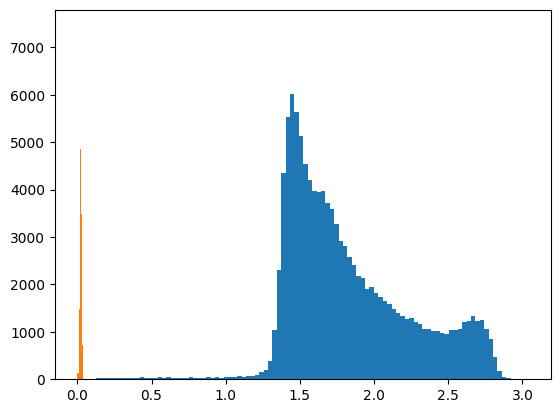

In [7]:
# The two distributions have to be different because the unit are different.

plt.hist(
    cloudy_gas_particles['metallicity'],
    bins = 100,
)
plt.hist(
    gas_particles_processed['metallicity'],
    bins = 100,
)
plt.show()